# Plot s value distributions for different periods

In [16]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/robustdemprior/'

Populating the interactive namespace from numpy and matplotlib


In [17]:
def main():
    print('Running main')
    # Different combinations of prior and model to graph
    # Prior options - 1, 2, 3
    # Model options - 20k, 50k, eurodem
    combos = [('1','eurodem'),('2','eurodem'),('3','eurodem'),('2','20k'),('2','50k')]
    
    fig_num = 0
    for combo in combos:
        
        fig_num = fig_num + 1
        prior = combo[0] 
        model = combo[1] 
        
        if model == 'eurodem':
            model_name = 'European demographic model (56k generations)'
        if model == '20k':
            model_name = '20k generations'
        if model == '50k':
            model_name = '50k generations'
        print('Running prior %s model %s'%(prior, model_name))
        total_threshold = 5214
        inFile = '/storage/BonnieH/selection_project/per_locus/SISTR_results_processed/0.005_3_0.3_yny5_%s_prior%s_all_per_0810.txt'%(model, prior)
        results_file = open(inFile, 'r')
        svals_dic = {} # Dictionary of s values
        svals_dic_normalized = {} # Dictionaries of normalized s values

        periods = [2,3,4]

        # Initialize dictionaries above
        # Key: period, value: list of binned s values
        # Bins: 0<=s<10^-4, 10^-4<=s<10^-3, 10^-3<=s<10^-2, s>=10^-2
        for per in periods:
            svals_dic[per] = [0,0,0,0] 
            svals_dic_normalized[per] = [0,0,0,0]

        header = results_file.readline().strip()

        # Read each line of results file
        for line in results_file:

            # Get information from line
            info = line.strip().split('\t')
            chrom = info[0]
            start = int(info[1])
            end = int(info[2])
            per = int(info[4])
            optimal_ru = int(info[5])
            ABC_s = info[17]
            total_n = int(info[3])

            if ABC_s != 'N/A' and total_n > total_threshold: 
                p_val = float(info[25])
                ABC_s = float(info[17])
                
                if p_val <= 0.05:
                    if ABC_s < 10**-4:
                        print('ABC s < 10^-4')
                        svals_dic[per][0] += 1
                    elif ABC_s < 10**-3:
                        svals_dic[per][1] += 1
                    elif ABC_s < 10**-2:
                        svals_dic[per][2] += 1
                    elif ABC_s >= 10**-2:
                        svals_dic[per][3] += 1

        results_file.close()

        
        plt.figure(num=fig_num, figsize=(10,6))

        # Fill in svals_dic_normalized (normalized version of svals_dic)
        for per in periods:
            sum_of_list = sum(svals_dic[per])
            for i in range(0, len(svals_dic[per])):
                svals_dic_normalized[per][i] = svals_dic[per][i]/sum_of_list

        #x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
        x = ['10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
        y_pos = np.arange(len(x))

        barWidth = 0.2
        r1 = np.arange(len(x))
        r2 = [y + barWidth for y in r1]
        r3 = [y - barWidth for y in r1]

        # Make the plot
        plt.bar(r3, svals_dic_normalized[2][1:], color='red', width=barWidth, edgecolor='white', label='dinucleotides') 
        plt.bar(r1, svals_dic_normalized[3][1:], color='gold', width=barWidth, edgecolor='white', label='trinucleotides') 
        plt.bar(r2, svals_dic_normalized[4][1:], color='blue', width=barWidth, edgecolor='white', label='tetranucleotides') 

        plt.xticks([r + barWidth/2 for r in range(len(x))], x)
        plt.xlabel("S value")
        plt.ylabel("Fraction of loci")
        plt.xticks(rotation=15)
        plt.title("Distribution of posterior estimates of selection coefficients for loci under selection \n Model: %s Prior %s"%(model_name, prior)) 
        plt.legend() 
        plt.savefig(PLOTDIR + "%s_prior_%s.pdf"%(model, prior),bbox_inches='tight')

Running main
Running prior 1 model European demographic model (56k generations)
Running prior 2 model European demographic model (56k generations)
Running prior 3 model European demographic model (56k generations)
Running prior 2 model 20k generations
Running prior 2 model 50k generations
CPU times: user 4.03 s, sys: 171 ms, total: 4.2 s
Wall time: 44 s


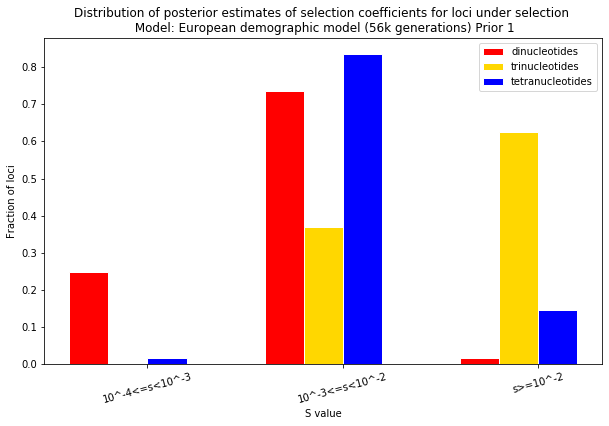

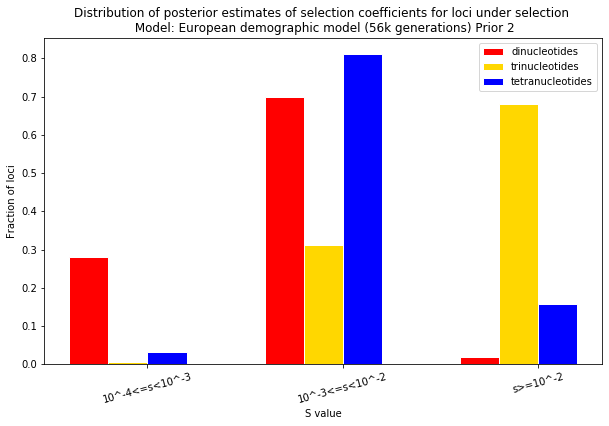

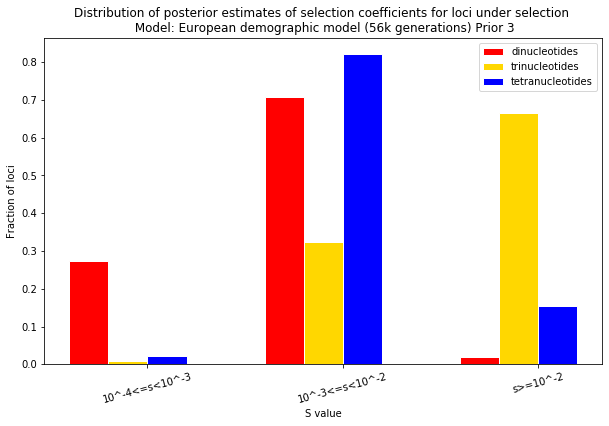

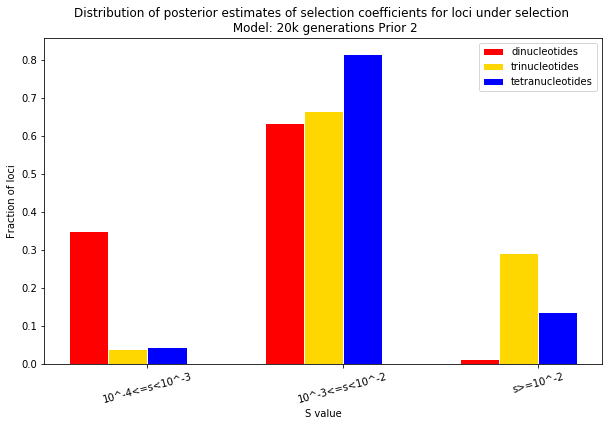

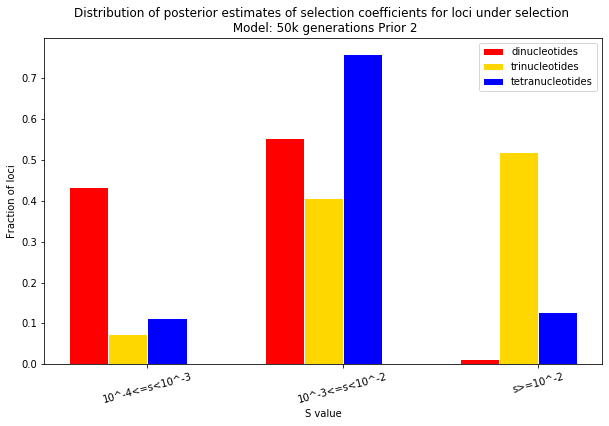

In [18]:
%%time
if __name__ == '__main__':
    main()